# Challenge: Factors that affect life expectancy


Throughout this module, we dove deep into the topics of exploratory data analysis (EDA) and its substeps. Now it's time to apply your knowledge. In this challenge, you'll work with the [Life Expectancy dataset](https://www.kaggle.com/kumarajarshi/life-expectancy-who/home) from Kaggle. The data is collected from the websites of the World Health Organisation (WHO) and World Bank (WB). The dataset contains annual variables for many of the countries in the world which are divided into several broad categories: immunization related factors, mortality factors, economical factors, and social factors.

Your goal in this challenge is to find the factors that affect the life expectancy. Specifically, you need to find out which factors increase the expected life in the countries and which factors decrease it.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('C:\Thinkful\Life_Expectancy_Data.csv')
df.head(100)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
5,Afghanistan,2010,Developing,58.8,279.0,74,0.01,79.679367,66.0,1989,...,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2
6,Afghanistan,2009,Developing,58.6,281.0,77,0.01,56.762217,63.0,2861,...,63.0,9.42,63.0,0.1,445.893298,284331.0,18.6,18.7,0.434,8.9
7,Afghanistan,2008,Developing,58.1,287.0,80,0.03,25.873925,64.0,1599,...,64.0,8.33,64.0,0.1,373.361116,2729431.0,18.8,18.9,0.433,8.7
8,Afghanistan,2007,Developing,57.5,295.0,82,0.02,10.910156,63.0,1141,...,63.0,6.73,63.0,0.1,369.835796,26616792.0,19.0,19.1,0.415,8.4
9,Afghanistan,2006,Developing,57.3,295.0,84,0.03,17.171518,64.0,1990,...,58.0,7.43,58.0,0.1,272.563770,2589345.0,19.2,19.3,0.405,8.1


### Dealing with missing values
Detect the problems with the data such as missing values and outliers. Are there any nonsense values that seem to be stemmed from the data collection? For the missing values, discuss which technique would be the most suitable one in filling out these values. Regarding the outliers, discuss their potential effects on your analysis and select an appropriate method to deal with them. 

In [2]:
##data type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
Country                            2938 non-null object
Year                               2938 non-null int64
Status                             2938 non-null object
Life expectancy                    2928 non-null float64
Adult Mortality                    2928 non-null float64
infant deaths                      2938 non-null int64
Alcohol                            2744 non-null float64
percentage expenditure             2938 non-null float64
Hepatitis B                        2385 non-null float64
Measles                            2938 non-null int64
 BMI                               2904 non-null float64
under-five deaths                  2938 non-null int64
Polio                              2919 non-null float64
Total expenditure                  2712 non-null float64
Diphtheria                         2919 non-null float64
 HIV/AIDS                          2938 non-null

In [3]:
##percentage of null values per column
df.isnull().mean()

Country                            0.000000
Year                               0.000000
Status                             0.000000
Life expectancy                    0.003404
Adult Mortality                    0.003404
infant deaths                      0.000000
Alcohol                            0.066031
percentage expenditure             0.000000
Hepatitis B                        0.188223
Measles                            0.000000
 BMI                               0.011572
under-five deaths                  0.000000
Polio                              0.006467
Total expenditure                  0.076923
Diphtheria                         0.006467
 HIV/AIDS                          0.000000
GDP                                0.152485
Population                         0.221920
 thinness  1-19 years              0.011572
 thinness 5-9 years                0.011572
Income composition of resources    0.056841
Schooling                          0.055480
dtype: float64

In [4]:
##list all country names
list(df['Country'].unique())

['Afghanistan',
 'Albania',
 'Algeria',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia (Plurinational State of)',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei Darussalam',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 "Côte d'Ivoire",
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo',
 'Cook Islands',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czechia',
 "Democratic People's Republic of Korea",
 'Democratic Republic of the Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guatemala'

There don't seem to be any duplicate country names upon first inspection.

Population is obviously an important column, and it has the highest percentage of null values. Let's start there. Printed below are all of the countries that contain a null population value.

In [5]:
##show list of countries with null population values
list(df['Country'].loc[df['Population'].isnull() == True].unique())

['Antigua and Barbuda',
 'Bahamas',
 'Bahrain',
 'Barbados',
 'Bolivia (Plurinational State of)',
 'Brunei Darussalam',
 "Côte d'Ivoire",
 'Congo',
 'Cook Islands',
 'Cuba',
 'Czechia',
 "Democratic People's Republic of Korea",
 'Democratic Republic of the Congo',
 'Dominica',
 'Egypt',
 'Eritrea',
 'Gambia',
 'Grenada',
 'Iran (Islamic Republic of)',
 'Kuwait',
 'Kyrgyzstan',
 "Lao People's Democratic Republic",
 'Libya',
 'Marshall Islands',
 'Micronesia (Federated States of)',
 'Monaco',
 'Nauru',
 'New Zealand',
 'Niue',
 'Oman',
 'Qatar',
 'Republic of Korea',
 'Republic of Moldova',
 'Saint Kitts and Nevis',
 'Saint Lucia',
 'Saint Vincent and the Grenadines',
 'San Marino',
 'Saudi Arabia',
 'Singapore',
 'Slovakia',
 'Somalia',
 'The former Yugoslav republic of Macedonia',
 'United Arab Emirates',
 'United Kingdom of Great Britain and Northern Ireland',
 'United Republic of Tanzania',
 'United States of America',
 'Venezuela (Bolivarian Republic of)',
 'Viet Nam',
 'Yemen']

Here is a list of what percentage of the population values are null for each country. 1.0 means all values are null.

In [6]:
##loop through list of countries with null population values and print percentage that are null
for country in list(df['Country'].loc[df['Population'].isnull() == True].unique()):
    print(country, 'Percent null:', df['Population'].loc[df['Country'] == country].isnull().mean())

Antigua and Barbuda Percent null: 1.0
Bahamas Percent null: 1.0
Bahrain Percent null: 1.0
Barbados Percent null: 1.0
Bolivia (Plurinational State of) Percent null: 1.0
Brunei Darussalam Percent null: 1.0
Côte d'Ivoire Percent null: 1.0
Congo Percent null: 1.0
Cook Islands Percent null: 1.0
Cuba Percent null: 1.0
Czechia Percent null: 1.0
Democratic People's Republic of Korea Percent null: 1.0
Democratic Republic of the Congo Percent null: 1.0
Dominica Percent null: 1.0
Egypt Percent null: 1.0
Eritrea Percent null: 0.25
Gambia Percent null: 1.0
Grenada Percent null: 1.0
Iran (Islamic Republic of) Percent null: 1.0
Kuwait Percent null: 1.0
Kyrgyzstan Percent null: 1.0
Lao People's Democratic Republic Percent null: 1.0
Libya Percent null: 1.0
Marshall Islands Percent null: 1.0
Micronesia (Federated States of) Percent null: 1.0
Monaco Percent null: 1.0
Nauru Percent null: 1.0
New Zealand Percent null: 1.0
Niue Percent null: 1.0
Oman Percent null: 1.0
Qatar Percent null: 1.0
Republic of Kor

The population column not only has a large amount of null values, upon further inspection, many of the countries' population values seem to differ by +/- 3 decimal places within the same country from year to year. This is obviously a very damaged area of the data set. We'll have to look to outside resources for better figures. I will load the population data from the [World Bank dataset](https://data.worldbank.org/indicator/SP.POP.TOTL).

In [7]:
population = pd.read_csv('C:\Thinkful\world_population.csv')
population.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,Unnamed: 63
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,101669.0,102046.0,102560.0,103159.0,103774.0,104341.0,104872.0,105366.0,105845.0,NaN
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996973.0,9169410.0,9351441.0,9543205.0,9744781.0,9956320.0,...,29185507.0,30117413.0,31161376.0,32269589.0,33370794.0,34413603.0,35383128.0,36296400.0,37172386.0,NaN
2,Angola,AGO,"Population, total",SP.POP.TOTL,5454933.0,5531472.0,5608539.0,5679458.0,5735044.0,5770570.0,...,23356246.0,24220661.0,25107931.0,26015780.0,26941779.0,27884381.0,28842484.0,29816748.0,30809762.0,NaN
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0,2866376.0,NaN
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,...,84449.0,83747.0,82427.0,80774.0,79213.0,78011.0,77297.0,77001.0,77006.0,NaN


In [8]:
##set country as index
population.set_index("Country Name", inplace=True)

In [9]:
##see years represented in original df
df['Year'].unique()

array([2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005,
       2004, 2003, 2002, 2001, 2000], dtype=int64)

Eventually we're going to join the new population dataframe to the original, so we'll trim it down to match.

In [10]:
##sliced population df to match the years in original df
trim_pop = population.loc[:, '2000':'2015'].copy()
trim_pop.head()

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country Name,,,,,,,,,,,,,,,,
Aruba,90853.0,92898.0,94992.0,97017.0,98737.0,100031.0,100834.0,101222.0,101358.0,101455.0,101669.0,102046.0,102560.0,103159.0,103774.0,104341.0
Afghanistan,20779953.0,21606988.0,22600770.0,23680871.0,24726684.0,25654277.0,26433049.0,27100536.0,27722276.0,28394813.0,29185507.0,30117413.0,31161376.0,32269589.0,33370794.0,34413603.0
Angola,16395473.0,16945753.0,17519417.0,18121479.0,18758145.0,19433602.0,20149901.0,20905363.0,21695634.0,22514281.0,23356246.0,24220661.0,25107931.0,26015780.0,26941779.0,27884381.0
Albania,3089027.0,3060173.0,3051010.0,3039616.0,3026939.0,3011487.0,2992547.0,2970017.0,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0
Andorra,65390.0,67341.0,70049.0,73182.0,76244.0,78867.0,80993.0,82684.0,83862.0,84463.0,84449.0,83747.0,82427.0,80774.0,79213.0,78011.0


In [11]:
## stack trim_pop so that the individual year columns become one column
ts = trim_pop.stack()
## resets the index so that country is removed as index and is reset to column
dts = ts.reset_index(name='Population')
## rename the column to Year
dts.rename(columns={'level_1': 'Year', 'Country Name':'Country'}, inplace=True)
dts.head()

,Country,Year,Population
0,Aruba,2000,90853.0
1,Aruba,2001,92898.0
2,Aruba,2002,94992.0
3,Aruba,2003,97017.0
4,Aruba,2004,98737.0


In [12]:
## change data type of year column to int to match original df
dts['Year'] = dts['Year'].astype(int)

Our year column now matches values and data type, and with an inner join, only the countries that match our original dataframe will be joined.

In [13]:
# Use merge function to join the dataframes. I used 'outer' so that values in both datasets appear
merge_df = pd.merge(dts,df, on=['Country','Year'], how="inner")
## rename population
merge_df.rename(columns={'Population_x': 'Population'}, inplace=True)
## drop dirty value column
merge_df.drop(columns=['Population_y'], inplace=True)
merge_df.head(100)

,Country,Year,Population,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,...,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2000,20779953.0,Developing,54.8,321.0,88,0.01,10.424960,62.0,...,122,24.0,8.20,24.0,0.1,114.560000,2.3,2.5,0.338,5.5
1,Afghanistan,2001,21606988.0,Developing,55.3,316.0,88,0.01,10.574728,63.0,...,122,35.0,7.80,33.0,0.1,117.496980,2.1,2.4,0.340,5.9
2,Afghanistan,2002,22600770.0,Developing,56.2,3.0,88,0.01,16.887351,64.0,...,122,36.0,7.76,36.0,0.1,187.845950,19.9,2.2,0.341,6.2
3,Afghanistan,2003,23680871.0,Developing,56.7,295.0,87,0.01,11.089053,65.0,...,122,41.0,8.82,41.0,0.1,198.728544,19.7,19.9,0.373,6.5
4,Afghanistan,2004,24726684.0,Developing,57.0,293.0,87,0.02,15.296066,67.0,...,120,5.0,8.79,5.0,0.1,219.141353,19.5,19.7,0.381,6.8
5,Afghanistan,2005,25654277.0,Developing,57.3,291.0,85,0.02,1.388648,66.0,...,118,58.0,8.70,58.0,0.1,25.294130,19.3,19.5,0.396,7.9
6,Afghanistan,2006,26433049.0,Developing,57.3,295.0,84,0.03,17.171518,64.0,...,116,58.0,7.43,58.0,0.1,272.563770,19.2,19.3,0.405,8.1
7,Afghanistan,2007,27100536.0,Developing,57.5,295.0,82,0.02,10.910156,63.0,...,113,63.0,6.73,63.0,0.1,369.835796,19.0,19.1,0.415,8.4
8,Afghanistan,2008,27722276.0,Developing,58.1,287.0,80,0.03,25.873925,64.0,...,110,64.0,8.33,64.0,0.1,373.361116,18.8,18.9,0.433,8.7
9,Afghanistan,2009,28394813.0,Developing,58.6,281.0,77,0.01,56.762217,63.0,...,106,63.0,9.42,63.0,0.1,445.893298,18.6,18.7,0.434,8.9


In [14]:
merge_df.shape

(2515, 22)

In [15]:
df.shape

(2938, 22)

With our join, we dropped any countries that weren't represented in the newer World Bank population data. However, we cleaned up the values for all other countries and we can be confident that the countries that were dropped were less significant for the big picture of our data. We still have a very nice dataset for all major countries and more. 

Let's look for more columns to clean.

In [16]:
##percentage of null values per column
merge_df.isnull().mean()

Country                            0.000000
Year                               0.000000
Population                         0.000000
Status                             0.000000
Life expectancy                    0.002783
Adult Mortality                    0.002783
infant deaths                      0.000000
Alcohol                            0.066799
percentage expenditure             0.000000
Hepatitis B                        0.198012
Measles                            0.000000
 BMI                               0.013519
under-five deaths                  0.000000
Polio                              0.007555
Total expenditure                  0.073161
Diphtheria                         0.007555
 HIV/AIDS                          0.000000
GDP                                0.016302
 thinness  1-19 years              0.013519
 thinness 5-9 years                0.013519
Income composition of resources    0.008350
Schooling                          0.006759
dtype: float64

Our main goal is to find life expectancy correlations, so let's get that column cleaned up next.

In [17]:
## found an unexpected space at the end of the column name
merge_df.rename(columns={'Life expectancy ': 'Life Expectancy'}, inplace=True)

In [18]:
merge_df.loc[merge_df['Life Expectancy'].isnull()==True]

,Country,Year,Population,Status,Life Expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,...,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
624,Dominica,2013,71016.0,Developing,NaN,NaN,0,0.01,11.419555,96.0,...,0,96.0,5.58,96.0,0.1,722.756650,2.7,2.6,0.721,12.7
1405,Monaco,2013,36901.0,Developing,NaN,NaN,0,0.01,0.000000,99.0,...,0,99.0,4.30,99.0,0.1,NaN,NaN,NaN,NaN,NaN
1454,Marshall Islands,2013,56938.0,Developing,NaN,NaN,0,0.01,871.878317,8.0,...,0,79.0,17.24,79.0,0.1,3617.752354,0.1,0.1,NaN,0.0
1727,Nauru,2013,10821.0,Developing,NaN,NaN,0,0.01,15.606596,87.0,...,0,87.0,4.65,87.0,0.1,136.183210,0.1,0.1,NaN,9.6
1824,Palau,2013,17606.0,Developing,NaN,NaN,0,NaN,344.690631,99.0,...,0,99.0,9.27,99.0,0.1,1932.122370,0.1,0.1,0.779,14.2
2065,San Marino,2013,32553.0,Developing,NaN,NaN,0,0.01,0.000000,69.0,...,0,69.0,6.50,69.0,0.1,NaN,NaN,NaN,NaN,15.1
2370,Tuvalu,2013,10857.0,Developing,NaN,NaN,0,0.01,78.281203,9.0,...,0,9.0,16.61,9.0,0.1,3542.135890,0.2,0.1,NaN,0.0


In [19]:
# see all values for Monaco
merge_df.loc[merge_df['Country']=='Monaco']

,Country,Year,Population,Status,Life Expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,...,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
1405,Monaco,2013,36901.0,Developing,NaN,NaN,0,0.01,0.0,99.0,...,0,99.0,4.3,99.0,0.1,NaN,NaN,NaN,NaN,NaN


There are only 7 rows that have null life expectancy and they're all one-offs of small countries. It makes sense to drop them.

In [20]:
## drop the rows with null life expectancy values
clean_life = merge_df.loc[merge_df['Life Expectancy'].isnull()==False]
clean_life.head()

,Country,Year,Population,Status,Life Expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,...,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2000,20779953.0,Developing,54.8,321.0,88,0.01,10.424960,62.0,...,122,24.0,8.20,24.0,0.1,114.560000,2.3,2.5,0.338,5.5
1,Afghanistan,2001,21606988.0,Developing,55.3,316.0,88,0.01,10.574728,63.0,...,122,35.0,7.80,33.0,0.1,117.496980,2.1,2.4,0.340,5.9
2,Afghanistan,2002,22600770.0,Developing,56.2,3.0,88,0.01,16.887351,64.0,...,122,36.0,7.76,36.0,0.1,187.845950,19.9,2.2,0.341,6.2
3,Afghanistan,2003,23680871.0,Developing,56.7,295.0,87,0.01,11.089053,65.0,...,122,41.0,8.82,41.0,0.1,198.728544,19.7,19.9,0.373,6.5
4,Afghanistan,2004,24726684.0,Developing,57.0,293.0,87,0.02,15.296066,67.0,...,120,5.0,8.79,5.0,0.1,219.141353,19.5,19.7,0.381,6.8


In [21]:
clean_life.isnull().mean()

Country                            0.000000
Year                               0.000000
Population                         0.000000
Status                             0.000000
Life Expectancy                    0.000000
Adult Mortality                    0.000000
infant deaths                      0.000000
Alcohol                            0.066587
percentage expenditure             0.000000
Hepatitis B                        0.198565
Measles                            0.000000
 BMI                               0.012759
under-five deaths                  0.000000
Polio                              0.007576
Total expenditure                  0.073365
Diphtheria                         0.007576
 HIV/AIDS                          0.000000
GDP                                0.015550
 thinness  1-19 years              0.012759
 thinness 5-9 years                0.012759
Income composition of resources    0.006380
Schooling                          0.006380
dtype: float64

At this point, we're gonna keep doing down the line and cleaning each column up. Alcohol is next.

In [22]:
## display null alcohol values
clean_life.loc[clean_life['Alcohol'].isnull()==True]

,Country,Year,Population,Status,Life Expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,...,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
31,Angola,2015,2.788438e+07,Developing,52.4,335.0,66,NaN,0.000000,64.0,...,98,7.0,NaN,64.0,1.9,3695.793748,8.3,8.2,0.531,11.4
63,United Arab Emirates,2015,9.262900e+06,Developing,77.1,75.0,1,NaN,0.000000,99.0,...,1,99.0,NaN,99.0,0.1,3911.746890,5.3,5.1,0.836,13.3
79,Argentina,2015,4.313197e+07,Developing,76.3,116.0,8,NaN,0.000000,94.0,...,9,93.0,NaN,94.0,0.1,13467.123600,1.0,0.9,0.826,17.3
95,Armenia,2015,2.925553e+06,Developing,74.8,118.0,1,NaN,0.000000,94.0,...,1,96.0,NaN,94.0,0.1,369.654776,2.1,2.2,0.741,12.7
111,Antigua and Barbuda,2015,9.356600e+04,Developing,76.4,13.0,0,NaN,0.000000,99.0,...,0,86.0,NaN,99.0,0.2,13566.954100,3.3,3.3,0.784,13.9
127,Australia,2015,2.381600e+07,Developed,82.8,59.0,1,NaN,0.000000,93.0,...,1,93.0,NaN,93.0,0.1,56554.387600,0.6,0.6,0.937,20.4
143,Austria,2015,8.642699e+06,Developed,81.5,65.0,0,NaN,0.000000,93.0,...,0,93.0,NaN,93.0,0.1,43665.947000,1.9,2.1,0.892,15.9
159,Azerbaijan,2015,9.649341e+06,Developing,72.7,118.0,5,NaN,0.000000,96.0,...,6,98.0,NaN,96.0,0.1,55.313820,2.8,2.9,0.758,12.7
175,Burundi,2015,1.016003e+07,Developing,59.6,288.0,21,NaN,0.000000,94.0,...,31,94.0,NaN,94.0,0.7,33.681223,7.3,7.2,0.406,10.6
191,Belgium,2015,1.127420e+07,Developed,81.1,74.0,0,NaN,0.000000,98.0,...,1,99.0,NaN,99.0,0.1,4356.875000,1.0,1.0,0.895,16.6


It looks like most of our missing alcohol data is from 2015. I think the best way to fill it would be to use the value from the year before.

In [23]:
## forward fill alcohol values
## not sure how to remove this warning, setting it equal to new variable didnt work
clean_life['Alcohol'].ffill(inplace=True)

c:\python34\lib\site-packages\pandas\core\generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [24]:
clean_life.isnull().mean()

Country                            0.000000
Year                               0.000000
Population                         0.000000
Status                             0.000000
Life Expectancy                    0.000000
Adult Mortality                    0.000000
infant deaths                      0.000000
Alcohol                            0.000000
percentage expenditure             0.000000
Hepatitis B                        0.198565
Measles                            0.000000
 BMI                               0.012759
under-five deaths                  0.000000
Polio                              0.007576
Total expenditure                  0.073365
Diphtheria                         0.007576
 HIV/AIDS                          0.000000
GDP                                0.015550
 thinness  1-19 years              0.012759
 thinness 5-9 years                0.012759
Income composition of resources    0.006380
Schooling                          0.006380
dtype: float64

the Hepatitis B column is next. The value represents the percentage of Hepatitis B (HepB) immunization coverage among 1-year-olds.

In [25]:
clean_life.loc[clean_life['Hepatitis B'].isnull()==True]

,Country,Year,Population,Status,Life Expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,...,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
16,Angola,2000,16395473.0,Developing,45.3,48.0,97,1.85,15.881493,NaN,...,160,3.0,2.79,28.0,2.0,555.296942,1.9,1.9,0.382,4.6
17,Angola,2001,16945753.0,Developing,45.7,44.0,97,2.58,30.359936,NaN,...,159,41.0,5.38,38.0,2.1,526.168743,1.7,1.7,0.391,5.1
18,Angola,2002,17519417.0,Developing,46.5,391.0,96,2.82,24.037942,NaN,...,157,37.0,3.63,41.0,2.3,711.181716,1.5,1.5,0.401,5.5
19,Angola,2003,18121479.0,Developing,46.8,388.0,95,3.49,35.933491,NaN,...,155,4.0,4.41,4.0,2.4,779.468356,1.4,1.3,0.406,5.9
20,Angola,2004,18758145.0,Developing,47.1,386.0,94,3.53,8.866777,NaN,...,152,4.0,4.71,4.0,2.5,141.868440,1.2,1.1,0.415,6.4
21,Angola,2005,19433602.0,Developing,47.4,382.0,92,5.04,98.191451,NaN,...,148,39.0,4.10,38.0,2.6,1443.991929,1.0,9.9,0.426,6.8
22,Angola,2006,20149901.0,Developing,47.7,381.0,90,5.84,25.086888,NaN,...,143,36.0,4.54,34.0,2.5,262.415149,9.8,9.7,0.439,7.2
64,Argentina,2000,36870787.0,Developing,74.1,137.0,12,7.68,1349.025282,NaN,...,14,88.0,9.21,83.0,0.1,7669.273916,1.2,1.1,0.764,15.0
65,Argentina,2001,37275652.0,Developing,74.0,138.0,12,7.76,123.012867,NaN,...,13,85.0,9.38,83.0,0.1,717.694674,1.2,1.1,0.771,15.6
96,Antigua and Barbuda,2000,76016.0,Developing,73.6,156.0,0,7.27,1127.743470,NaN,...,0,96.0,4.13,95.0,0.1,9875.161736,3.7,3.6,0.000,0.0


In [26]:
clean_life.loc[clean_life['Country']=='Zambia']

,Country,Year,Population,Status,Life Expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,...,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2483,Zambia,2000,10415944.0,Developing,43.8,614.0,44,2.62,45.616880,NaN,...,72,85.0,7.16,85.0,18.7,341.955625,7.5,7.5,0.418,9.6
2484,Zambia,2001,10692193.0,Developing,44.6,611.0,43,2.61,46.830275,NaN,...,70,86.0,6.56,85.0,18.6,378.273624,7.4,7.4,0.424,9.8
2485,Zambia,2002,10971698.0,Developing,45.5,69.0,41,2.44,54.043480,NaN,...,66,85.0,6.93,84.0,18.4,377.135244,7.4,7.3,0.433,10.0
2486,Zambia,2003,11256743.0,Developing,46.4,64.0,39,2.33,65.789974,NaN,...,62,85.0,8.18,83.0,18.2,429.158343,7.3,7.2,0.443,10.2
2487,Zambia,2004,11550642.0,Developing,47.9,578.0,36,2.46,8.369852,NaN,...,59,84.0,7.33,83.0,17.6,53.277222,7.2,7.1,0.456,10.5
2488,Zambia,2005,11856247.0,Developing,49.3,554.0,34,2.33,121.879331,82.0,...,55,84.0,7.56,82.0,17.0,691.317816,7.1,7.0,0.467,10.7
2489,Zambia,2006,12173514.0,Developing,58.0,526.0,33,2.25,1.860004,81.0,...,52,83.0,6.11,81.0,15.9,13.154199,7.0,6.9,0.479,10.9
2490,Zambia,2007,12502958.0,Developing,52.6,487.0,32,2.08,10.851482,8.0,...,51,77.0,4.37,8.0,13.6,114.587985,6.9,6.8,0.492,11.1
2491,Zambia,2008,12848530.0,Developing,55.7,45.0,31,2.12,153.678375,87.0,...,49,9.0,4.87,87.0,11.9,1369.682490,6.8,6.7,0.504,11.4
2492,Zambia,2009,13215139.0,Developing,57.4,368.0,30,2.30,143.869887,94.0,...,47,93.0,4.73,94.0,9.1,1139.112330,6.7,6.6,0.518,11.6


The null values seem scattered, with no discernable pattern for why they're null, which means we can fill them using the mean or median by country. Since I see a few values in the column that seem like outliers due to a decimal place being in the wrong place, I'll fill the null values with the median of the group.

In [27]:
## fill hep b column null values with median by country
clean_life['Hepatitis B'] = clean_life.groupby('Country')['Hepatitis B'].transform(lambda x: x.fillna(x.median()))

c:\python34\lib\site-packages\numpy\lib\nanfunctions.py:1076: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\python34\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [28]:
clean_life.loc[clean_life['Country']=='Zambia']

,Country,Year,Population,Status,Life Expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,...,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2483,Zambia,2000,10415944.0,Developing,43.8,614.0,44,2.62,45.616880,81.0,...,72,85.0,7.16,85.0,18.7,341.955625,7.5,7.5,0.418,9.6
2484,Zambia,2001,10692193.0,Developing,44.6,611.0,43,2.61,46.830275,81.0,...,70,86.0,6.56,85.0,18.6,378.273624,7.4,7.4,0.424,9.8
2485,Zambia,2002,10971698.0,Developing,45.5,69.0,41,2.44,54.043480,81.0,...,66,85.0,6.93,84.0,18.4,377.135244,7.4,7.3,0.433,10.0
2486,Zambia,2003,11256743.0,Developing,46.4,64.0,39,2.33,65.789974,81.0,...,62,85.0,8.18,83.0,18.2,429.158343,7.3,7.2,0.443,10.2
2487,Zambia,2004,11550642.0,Developing,47.9,578.0,36,2.46,8.369852,81.0,...,59,84.0,7.33,83.0,17.6,53.277222,7.2,7.1,0.456,10.5
2488,Zambia,2005,11856247.0,Developing,49.3,554.0,34,2.33,121.879331,82.0,...,55,84.0,7.56,82.0,17.0,691.317816,7.1,7.0,0.467,10.7
2489,Zambia,2006,12173514.0,Developing,58.0,526.0,33,2.25,1.860004,81.0,...,52,83.0,6.11,81.0,15.9,13.154199,7.0,6.9,0.479,10.9
2490,Zambia,2007,12502958.0,Developing,52.6,487.0,32,2.08,10.851482,8.0,...,51,77.0,4.37,8.0,13.6,114.587985,6.9,6.8,0.492,11.1
2491,Zambia,2008,12848530.0,Developing,55.7,45.0,31,2.12,153.678375,87.0,...,49,9.0,4.87,87.0,11.9,1369.682490,6.8,6.7,0.504,11.4
2492,Zambia,2009,13215139.0,Developing,57.4,368.0,30,2.30,143.869887,94.0,...,47,93.0,4.73,94.0,9.1,1139.112330,6.7,6.6,0.518,11.6


In [29]:
clean_life.loc[clean_life['Hepatitis B'].isnull()==True]

,Country,Year,Population,Status,Life Expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,...,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
432,Switzerland,2000,7184250.0,Developed,79.7,78.0,0,11.26,5834.582046,NaN,...,0,95.0,9.91,93.0,0.1,37813.23426,0.7,0.5,0.879,15.1
433,Switzerland,2001,7229854.0,Developed,82.0,75.0,0,11.12,6478.346135,NaN,...,0,95.0,1.28,93.0,0.1,38538.64447,0.7,0.5,0.888,15.2
434,Switzerland,2002,7284753.0,Developed,84.0,74.0,0,10.85,6853.628494,NaN,...,0,95.0,1.61,93.0,0.1,41336.72192,0.6,0.5,0.890,15.2
435,Switzerland,2003,7339001.0,Developed,85.0,72.0,0,10.82,842.276809,NaN,...,0,95.0,1.93,93.0,0.1,4796.56497,0.6,0.5,0.889,15.0
436,Switzerland,2004,7389625.0,Developed,81.0,69.0,0,10.55,9495.540576,NaN,...,0,95.0,1.96,93.0,0.1,53255.97631,0.6,0.4,0.895,15.1
437,Switzerland,2005,7437115.0,Developed,81.1,66.0,0,10.15,10055.349810,NaN,...,0,94.0,1.86,94.0,0.1,54797.54663,0.6,0.4,0.899,15.2
438,Switzerland,2006,7483934.0,Developed,81.5,65.0,0,10.24,10598.081870,NaN,...,0,94.0,1.39,94.0,0.1,57348.92788,0.6,0.4,0.904,15.2
439,Switzerland,2007,7551117.0,Developed,81.7,63.0,0,10.44,11892.334290,NaN,...,0,94.0,1.21,94.0,0.1,63223.46778,0.5,0.4,0.911,15.3
440,Switzerland,2008,7647675.0,Developed,82.0,6.0,0,10.29,2084.255535,NaN,...,0,96.0,1.29,95.0,0.1,72119.56870,0.5,0.4,0.914,15.3
441,Switzerland,2009,7743831.0,Developed,82.1,6.0,0,10.15,14714.825880,NaN,...,0,96.0,11.00,95.0,0.1,69672.47100,0.5,0.4,0.916,15.3


Most of the null values were filled, with the exception of countries where all Hep B values are null. I'll fill the remaining values with the median by "status" group.

In [30]:
## fill null values in hep B column with median by status
clean_life['Hepatitis B'] = clean_life.groupby('Status')['Hepatitis B'].transform(lambda x: x.fillna(x.median()))

c:\python34\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [31]:
clean_life.isnull().mean()

Country                            0.000000
Year                               0.000000
Population                         0.000000
Status                             0.000000
Life Expectancy                    0.000000
Adult Mortality                    0.000000
infant deaths                      0.000000
Alcohol                            0.000000
percentage expenditure             0.000000
Hepatitis B                        0.000000
Measles                            0.000000
 BMI                               0.012759
under-five deaths                  0.000000
Polio                              0.007576
Total expenditure                  0.073365
Diphtheria                         0.007576
 HIV/AIDS                          0.000000
GDP                                0.015550
 thinness  1-19 years              0.012759
 thinness 5-9 years                0.012759
Income composition of resources    0.006380
Schooling                          0.006380
dtype: float64

In [32]:
## getting rid of unexpected spaces in column name
clean_life.rename(columns={' BMI ': 'BMI'}, inplace=True)

c:\python34\lib\site-packages\pandas\core\frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


Next up is BMI.

In [33]:
## show null BMI values
clean_life.loc[clean_life['BMI'].isnull()==True]

,Country,Year,Population,Status,Life Expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,...,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
1969,Sudan,2000,27275015.0,Developing,58.6,284.0,71,1.76,30.860010,78.0,...,109,62.0,3.23,62.0,0.1,361.358430,NaN,NaN,0.394,5.5
1970,Sudan,2001,27971082.0,Developing,58.9,283.0,71,1.81,28.880697,78.0,...,108,66.0,2.96,66.0,0.2,377.525445,NaN,NaN,0.399,5.6
1971,Sudan,2002,28704778.0,Developing,59.4,277.0,70,1.59,30.622875,78.0,...,106,6.0,2.95,6.0,0.2,412.151756,NaN,NaN,0.403,5.6
1972,Sudan,2003,29460519.0,Developing,59.6,278.0,69,1.74,35.352647,78.0,...,104,69.0,3.18,69.0,0.2,477.738478,NaN,NaN,0.409,5.6
1973,Sudan,2004,30214193.0,Developing,59.7,278.0,68,1.59,37.044800,78.0,...,102,74.0,3.39,74.0,0.2,565.569459,NaN,NaN,0.415,5.7
1974,Sudan,2005,30949516.0,Developing,67.0,261.0,66,1.55,37.590396,22.0,...,101,78.0,3.18,78.0,0.2,679.753995,NaN,NaN,0.423,6.1
1975,Sudan,2006,31661823.0,Developing,61.0,26.0,66,1.90,60.336857,6.0,...,99,77.0,3.93,78.0,0.2,893.879364,NaN,NaN,0.430,6.2
1976,Sudan,2007,32360621.0,Developing,61.4,254.0,65,2.01,86.131669,78.0,...,97,84.0,4.72,84.0,0.3,1115.695200,NaN,NaN,0.440,6.4
1977,Sudan,2008,33060837.0,Developing,61.8,251.0,64,2.01,128.636271,78.0,...,95,85.0,8.17,86.0,0.3,1291.528826,NaN,NaN,0.444,6.3
1978,Sudan,2009,33783788.0,Developing,62.0,248.0,63,1.99,17.053693,72.0,...,94,81.0,8.40,81.0,0.3,1226.884381,NaN,NaN,0.456,6.8


Just two countries missing values for BMI. I'll fill them with the median by status again.

In [34]:
## fill null values in hep B column with median by status
clean_life['BMI'] = clean_life.groupby('Status')['BMI'].transform(lambda x: x.fillna(x.median()))

c:\python34\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [35]:
clean_life.isnull().mean()

Country                            0.000000
Year                               0.000000
Population                         0.000000
Status                             0.000000
Life Expectancy                    0.000000
Adult Mortality                    0.000000
infant deaths                      0.000000
Alcohol                            0.000000
percentage expenditure             0.000000
Hepatitis B                        0.000000
Measles                            0.000000
BMI                                0.000000
under-five deaths                  0.000000
Polio                              0.007576
Total expenditure                  0.073365
Diphtheria                         0.007576
 HIV/AIDS                          0.000000
GDP                                0.015550
 thinness  1-19 years              0.012759
 thinness 5-9 years                0.012759
Income composition of resources    0.006380
Schooling                          0.006380
dtype: float64

Polio is next.

In [36]:
##show rows with null Polio values
clean_life.loc[clean_life['Polio'].isnull()==True]

,Country,Year,Population,Status,Life Expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,...,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
1503,Montenegro,2000,604950.0,Developing,73.0,144.0,0,0.01,274.547260,45.5,...,0,NaN,7.32,NaN,0.1,1627.428930,2.6,2.7,0.000,0.0
1504,Montenegro,2001,607389.0,Developing,73.3,136.0,0,0.01,33.669814,45.5,...,0,NaN,8.23,NaN,0.1,199.583957,2.5,2.6,0.000,0.0
1505,Montenegro,2002,609828.0,Developing,73.4,136.0,0,0.01,36.480240,45.5,...,0,NaN,8.33,NaN,0.1,216.243274,2.5,2.5,0.000,0.0
1506,Montenegro,2003,612267.0,Developing,73.5,134.0,0,0.01,495.078296,45.5,...,0,NaN,8.91,NaN,0.1,2789.173500,2.4,2.4,0.000,0.0
1507,Montenegro,2004,613353.0,Developing,73.5,134.0,0,0.01,57.121901,45.5,...,0,NaN,8.45,NaN,0.1,338.199535,2.3,2.4,0.740,12.6
1508,Montenegro,2005,614261.0,Developing,73.6,133.0,0,0.01,527.307672,45.5,...,0,NaN,8.46,NaN,0.1,3674.617924,2.3,2.3,0.746,12.8
2098,South Sudan,2000,6199394.0,Developing,48.9,38.0,31,9.09,0.000000,31.0,...,50,NaN,NaN,NaN,2.7,NaN,NaN,NaN,0.000,0.0
2099,South Sudan,2001,6447793.0,Developing,49.6,381.0,30,9.09,0.000000,31.0,...,49,NaN,NaN,NaN,3.0,NaN,NaN,NaN,0.000,0.0
2100,South Sudan,2002,6688226.0,Developing,52.0,382.0,30,9.09,0.000000,31.0,...,48,NaN,NaN,NaN,3.3,NaN,NaN,NaN,0.000,0.0
2101,South Sudan,2003,6935676.0,Developing,58.0,383.0,29,9.09,0.000000,31.0,...,46,NaN,NaN,NaN,3.5,NaN,NaN,NaN,0.000,0.0


The median value by status seems to be a good way to fill the medical related columns, so we'll do it again.

In [37]:
## fill null values in Polio column with median by status
clean_life['Polio'] = clean_life.groupby('Status')['BMI'].transform(lambda x: x.fillna(x.median()))

c:\python34\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [38]:
clean_life.isnull().mean()

Country                            0.000000
Year                               0.000000
Population                         0.000000
Status                             0.000000
Life Expectancy                    0.000000
Adult Mortality                    0.000000
infant deaths                      0.000000
Alcohol                            0.000000
percentage expenditure             0.000000
Hepatitis B                        0.000000
Measles                            0.000000
BMI                                0.000000
under-five deaths                  0.000000
Polio                              0.000000
Total expenditure                  0.073365
Diphtheria                         0.007576
 HIV/AIDS                          0.000000
GDP                                0.015550
 thinness  1-19 years              0.012759
 thinness 5-9 years                0.012759
Income composition of resources    0.006380
Schooling                          0.006380
dtype: float64

In [39]:
##show rows with null expenditure values
clean_life.loc[clean_life['Total expenditure'].isnull()==True]

,Country,Year,Population,Status,Life Expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,...,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
31,Angola,2015,2.788438e+07,Developing,52.4,335.0,66,8.33,0.0,64.0,...,98,23.3,NaN,64.0,1.9,3695.793748,8.3,8.2,0.531,11.4
63,United Arab Emirates,2015,9.262900e+06,Developing,77.1,75.0,1,1.91,0.0,99.0,...,1,64.2,NaN,99.0,0.1,3911.746890,5.3,5.1,0.836,13.3
79,Argentina,2015,4.313197e+07,Developing,76.3,116.0,8,7.93,0.0,94.0,...,9,62.8,NaN,94.0,0.1,13467.123600,1.0,0.9,0.826,17.3
95,Armenia,2015,2.925553e+06,Developing,74.8,118.0,1,3.91,0.0,94.0,...,1,54.9,NaN,94.0,0.1,369.654776,2.1,2.2,0.741,12.7
111,Antigua and Barbuda,2015,9.356600e+04,Developing,76.4,13.0,0,8.56,0.0,99.0,...,0,47.7,NaN,99.0,0.2,13566.954100,3.3,3.3,0.784,13.9
127,Australia,2015,2.381600e+07,Developed,82.8,59.0,1,9.71,0.0,93.0,...,1,66.6,NaN,93.0,0.1,56554.387600,0.6,0.6,0.937,20.4
143,Austria,2015,8.642699e+06,Developed,81.5,65.0,0,12.32,0.0,93.0,...,0,57.6,NaN,93.0,0.1,43665.947000,1.9,2.1,0.892,15.9
159,Azerbaijan,2015,9.649341e+06,Developing,72.7,118.0,5,0.01,0.0,96.0,...,6,52.5,NaN,96.0,0.1,55.313820,2.8,2.9,0.758,12.7
175,Burundi,2015,1.016003e+07,Developing,59.6,288.0,21,0.01,0.0,94.0,...,31,18.7,NaN,94.0,0.7,33.681223,7.3,7.2,0.406,10.6
191,Belgium,2015,1.127420e+07,Developed,81.1,74.0,0,12.60,0.0,98.0,...,1,63.7,NaN,99.0,0.1,4356.875000,1.0,1.0,0.895,16.6


Looks like its mostly total expenditure values from 2015 that are missing. With financial data, I feel that trends over time are important, so I'll forward fill the null values to maintain some chronology.

In [40]:
##forward fill expenditure column
clean_life['Total expenditure'].ffill(inplace=True)

c:\python34\lib\site-packages\pandas\core\generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [41]:
clean_life.isnull().mean()

Country                            0.000000
Year                               0.000000
Population                         0.000000
Status                             0.000000
Life Expectancy                    0.000000
Adult Mortality                    0.000000
infant deaths                      0.000000
Alcohol                            0.000000
percentage expenditure             0.000000
Hepatitis B                        0.000000
Measles                            0.000000
BMI                                0.000000
under-five deaths                  0.000000
Polio                              0.000000
Total expenditure                  0.000000
Diphtheria                         0.007576
 HIV/AIDS                          0.000000
GDP                                0.015550
 thinness  1-19 years              0.012759
 thinness 5-9 years                0.012759
Income composition of resources    0.006380
Schooling                          0.006380
dtype: float64

In [42]:
##remove unexpected spaces from column name
clean_life.rename(columns={'Diphtheria ': 'Diphtheria'}, inplace=True)
##show rows with null diptheria values
clean_life.loc[clean_life['Diphtheria'].isnull()==True]

c:\python34\lib\site-packages\pandas\core\frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


,Country,Year,Population,Status,Life Expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,...,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
1503,Montenegro,2000,604950.0,Developing,73.0,144.0,0,0.01,274.547260,45.5,...,0,51.9,7.32,NaN,0.1,1627.428930,2.6,2.7,0.000,0.0
1504,Montenegro,2001,607389.0,Developing,73.3,136.0,0,0.01,33.669814,45.5,...,0,52.7,8.23,NaN,0.1,199.583957,2.5,2.6,0.000,0.0
1505,Montenegro,2002,609828.0,Developing,73.4,136.0,0,0.01,36.480240,45.5,...,0,53.5,8.33,NaN,0.1,216.243274,2.5,2.5,0.000,0.0
1506,Montenegro,2003,612267.0,Developing,73.5,134.0,0,0.01,495.078296,45.5,...,0,54.2,8.91,NaN,0.1,2789.173500,2.4,2.4,0.000,0.0
1507,Montenegro,2004,613353.0,Developing,73.5,134.0,0,0.01,57.121901,45.5,...,0,55.0,8.45,NaN,0.1,338.199535,2.3,2.4,0.740,12.6
1508,Montenegro,2005,614261.0,Developing,73.6,133.0,0,0.01,527.307672,45.5,...,0,55.7,8.46,NaN,0.1,3674.617924,2.3,2.3,0.746,12.8
2098,South Sudan,2000,6199394.0,Developing,48.9,38.0,31,9.09,0.000000,31.0,...,50,35.7,1.37,NaN,2.7,NaN,NaN,NaN,0.000,0.0
2099,South Sudan,2001,6447793.0,Developing,49.6,381.0,30,9.09,0.000000,31.0,...,49,35.7,1.37,NaN,3.0,NaN,NaN,NaN,0.000,0.0
2100,South Sudan,2002,6688226.0,Developing,52.0,382.0,30,9.09,0.000000,31.0,...,48,35.7,1.37,NaN,3.3,NaN,NaN,NaN,0.000,0.0
2101,South Sudan,2003,6935676.0,Developing,58.0,383.0,29,9.09,0.000000,31.0,...,46,35.7,1.37,NaN,3.5,NaN,NaN,NaN,0.000,0.0


I'll fill with the median by status since its another medical category.

In [43]:
## fill null values in diptheria column with median by status
clean_life['Diphtheria'] = clean_life.groupby('Status')['Diphtheria'].transform(lambda x: x.fillna(x.median()))

c:\python34\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [44]:
clean_life.isnull().mean()

Country                            0.000000
Year                               0.000000
Population                         0.000000
Status                             0.000000
Life Expectancy                    0.000000
Adult Mortality                    0.000000
infant deaths                      0.000000
Alcohol                            0.000000
percentage expenditure             0.000000
Hepatitis B                        0.000000
Measles                            0.000000
BMI                                0.000000
under-five deaths                  0.000000
Polio                              0.000000
Total expenditure                  0.000000
Diphtheria                         0.000000
 HIV/AIDS                          0.000000
GDP                                0.015550
 thinness  1-19 years              0.012759
 thinness 5-9 years                0.012759
Income composition of resources    0.006380
Schooling                          0.006380
dtype: float64

In [45]:
##show rows with null GDP values
clean_life.loc[clean_life['GDP'].isnull()==True]

,Country,Year,Population,Status,Life Expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,...,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
1069,Iraq,2000,23497585.0,Developing,70.0,144.0,30,0.20,0.0,67.0,...,37,49.5,7.78,8.0,0.1,NaN,5.6,5.4,0.603,8.6
1070,Iraq,2001,24208180.0,Developing,72.0,142.0,30,0.17,0.0,66.0,...,37,5.1,7.78,78.0,0.1,NaN,5.6,5.3,0.607,8.7
1071,Iraq,2002,24931919.0,Developing,74.0,14.0,30,0.15,0.0,65.0,...,37,5.6,7.78,77.0,0.1,NaN,5.5,5.3,0.614,9.1
1072,Iraq,2003,25644499.0,Developing,66.5,213.0,30,0.07,0.0,63.0,...,37,51.3,4.36,75.0,0.1,NaN,5.5,5.2,0.616,9.4
1305,Libya,2012,6285750.0,Developing,72.9,133.0,2,0.01,0.0,98.0,...,2,61.8,4.30,98.0,0.1,NaN,5.6,5.4,0.706,13.7
1306,Libya,2013,6320359.0,Developing,72.9,134.0,2,0.01,0.0,96.0,...,2,62.8,4.33,96.0,0.1,NaN,5.7,5.5,0.735,13.4
1307,Libya,2014,6362037.0,Developing,72.4,143.0,2,0.01,0.0,94.0,...,2,63.8,4.97,94.0,0.1,NaN,5.7,5.5,0.730,13.4
1308,Libya,2015,6418315.0,Developing,72.7,138.0,1,0.01,0.0,97.0,...,2,64.8,4.97,97.0,0.1,NaN,5.8,5.5,0.719,13.4
1840,Papua New Guinea,2015,8107775.0,Developing,62.9,275.0,10,0.01,0.0,67.0,...,12,48.6,4.26,73.0,0.6,NaN,1.3,1.3,0.515,10.0
2066,Somalia,2000,8872254.0,Developing,55.0,355.0,45,0.01,0.0,42.0,...,74,17.8,6.77,33.0,0.8,NaN,8.0,7.9,NaN,NaN


Let's forward fill the GDP column since its a financial category.

In [46]:
## forward fill the GDP null values
clean_life['GDP'].ffill(inplace=True)

c:\python34\lib\site-packages\pandas\core\generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [47]:
clean_life.isnull().mean()

Country                            0.000000
Year                               0.000000
Population                         0.000000
Status                             0.000000
Life Expectancy                    0.000000
Adult Mortality                    0.000000
infant deaths                      0.000000
Alcohol                            0.000000
percentage expenditure             0.000000
Hepatitis B                        0.000000
Measles                            0.000000
BMI                                0.000000
under-five deaths                  0.000000
Polio                              0.000000
Total expenditure                  0.000000
Diphtheria                         0.000000
 HIV/AIDS                          0.000000
GDP                                0.000000
 thinness  1-19 years              0.012759
 thinness 5-9 years                0.012759
Income composition of resources    0.006380
Schooling                          0.006380
dtype: float64

In [48]:
##remove unexpected spaces from column name
clean_life.rename(columns={' thinness 5-9 years': 'Thinness 5-9 years',' thinness  1-19 years':'Thinness  1-19 years' }, inplace=True)
clean_life.loc[clean_life['Thinness 5-9 years'].isnull()==True]

c:\python34\lib\site-packages\pandas\core\frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


,Country,Year,Population,Status,Life Expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,...,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Thinness 1-19 years,Thinness 5-9 years,Income composition of resources,Schooling
1969,Sudan,2000,27275015.0,Developing,58.6,284.0,71,1.76,30.860010,78.0,...,109,35.7,3.23,62.0,0.1,361.358430,NaN,NaN,0.394,5.5
1970,Sudan,2001,27971082.0,Developing,58.9,283.0,71,1.81,28.880697,78.0,...,108,35.7,2.96,66.0,0.2,377.525445,NaN,NaN,0.399,5.6
1971,Sudan,2002,28704778.0,Developing,59.4,277.0,70,1.59,30.622875,78.0,...,106,35.7,2.95,6.0,0.2,412.151756,NaN,NaN,0.403,5.6
1972,Sudan,2003,29460519.0,Developing,59.6,278.0,69,1.74,35.352647,78.0,...,104,35.7,3.18,69.0,0.2,477.738478,NaN,NaN,0.409,5.6
1973,Sudan,2004,30214193.0,Developing,59.7,278.0,68,1.59,37.044800,78.0,...,102,35.7,3.39,74.0,0.2,565.569459,NaN,NaN,0.415,5.7
1974,Sudan,2005,30949516.0,Developing,67.0,261.0,66,1.55,37.590396,22.0,...,101,35.7,3.18,78.0,0.2,679.753995,NaN,NaN,0.423,6.1
1975,Sudan,2006,31661823.0,Developing,61.0,26.0,66,1.90,60.336857,6.0,...,99,35.7,3.93,78.0,0.2,893.879364,NaN,NaN,0.430,6.2
1976,Sudan,2007,32360621.0,Developing,61.4,254.0,65,2.01,86.131669,78.0,...,97,35.7,4.72,84.0,0.3,1115.695200,NaN,NaN,0.440,6.4
1977,Sudan,2008,33060837.0,Developing,61.8,251.0,64,2.01,128.636271,78.0,...,95,35.7,8.17,86.0,0.3,1291.528826,NaN,NaN,0.444,6.3
1978,Sudan,2009,33783788.0,Developing,62.0,248.0,63,1.99,17.053693,72.0,...,94,35.7,8.40,81.0,0.3,1226.884381,NaN,NaN,0.456,6.8


We'll fill the two thinness categories with median by status again since it's a medical category.

In [49]:
## fill 'Thinness 5-9 years' null values with median by status
clean_life['Thinness 5-9 years'] = clean_life.groupby('Status')['Thinness 5-9 years'].transform(lambda x: x.fillna(x.median()))

c:\python34\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [50]:
## fill Thinness  1-19 years null values with median by status
clean_life['Thinness  1-19 years'] = clean_life.groupby('Status')['Thinness  1-19 years'].transform(lambda x: x.fillna(x.median()))

c:\python34\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [51]:
clean_life.isnull().mean()

Country                            0.00000
Year                               0.00000
Population                         0.00000
Status                             0.00000
Life Expectancy                    0.00000
Adult Mortality                    0.00000
infant deaths                      0.00000
Alcohol                            0.00000
percentage expenditure             0.00000
Hepatitis B                        0.00000
Measles                            0.00000
BMI                                0.00000
under-five deaths                  0.00000
Polio                              0.00000
Total expenditure                  0.00000
Diphtheria                         0.00000
 HIV/AIDS                          0.00000
GDP                                0.00000
Thinness  1-19 years               0.00000
Thinness 5-9 years                 0.00000
Income composition of resources    0.00638
Schooling                          0.00638
dtype: float64

In [52]:
clean_life.loc[clean_life['Income composition of resources'].isnull()==True]

,Country,Year,Population,Status,Life Expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,...,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Thinness 1-19 years,Thinness 5-9 years,Income composition of resources,Schooling
2066,Somalia,2000,8872254.0,Developing,55.0,355.0,45,0.01,0.0,42.0,...,74,17.8,6.77,33.0,0.8,4127.117750,8.0,7.9,NaN,NaN
2067,Somalia,2001,9186725.0,Developing,57.0,352.0,46,0.01,0.0,42.0,...,75,18.2,6.77,33.0,0.8,4127.117750,7.9,7.7,NaN,NaN
2068,Somalia,2002,9501342.0,Developing,58.0,348.0,47,0.01,0.0,42.0,...,77,18.6,6.77,4.0,0.9,4127.117750,7.8,7.6,NaN,NaN
2069,Somalia,2003,9815412.0,Developing,51.1,344.0,48,0.01,0.0,42.0,...,78,19.0,6.77,4.0,0.9,4127.117750,7.7,7.5,NaN,NaN
2070,Somalia,2004,10130243.0,Developing,51.2,341.0,49,0.01,0.0,42.0,...,80,19.4,6.77,3.0,0.9,4127.117750,7.6,7.4,NaN,NaN
2071,Somalia,2005,10446863.0,Developing,51.6,334.0,50,0.01,0.0,42.0,...,82,19.8,6.77,35.0,0.9,4127.117750,7.5,7.3,NaN,NaN
2072,Somalia,2006,10763905.0,Developing,51.5,337.0,51,0.01,0.0,42.0,...,83,2.2,6.77,26.0,0.9,4127.117750,7.4,7.2,NaN,NaN
2073,Somalia,2007,11080121.0,Developing,51.5,34.0,52,0.01,0.0,42.0,...,84,2.7,6.77,4.0,0.9,4127.117750,7.3,7.1,NaN,NaN
2074,Somalia,2008,11397188.0,Developing,51.9,336.0,52,0.01,0.0,42.0,...,84,21.1,6.77,31.0,0.9,4127.117750,7.2,7.0,NaN,NaN
2075,Somalia,2009,11717692.0,Developing,52.2,335.0,52,0.01,0.0,42.0,...,84,21.5,6.77,42.0,0.8,4127.117750,7.1,6.9,NaN,NaN


We'll fill the null values in the last two columns with median by status.

In [53]:
## fill Income composition of resources null values with median by status
clean_life['Income composition of resources'] = clean_life.groupby('Status')['Income composition of resources'].transform(lambda x: x.fillna(x.median()))

c:\python34\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [54]:
## fill Schooling null values with median by status
clean_life['Schooling'] = clean_life.groupby('Status')['Schooling'].transform(lambda x: x.fillna(x.median()))

c:\python34\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [55]:
full_df = clean_life
full_df.isnull().mean()

Country                            0.0
Year                               0.0
Population                         0.0
Status                             0.0
Life Expectancy                    0.0
Adult Mortality                    0.0
infant deaths                      0.0
Alcohol                            0.0
percentage expenditure             0.0
Hepatitis B                        0.0
Measles                            0.0
BMI                                0.0
under-five deaths                  0.0
Polio                              0.0
Total expenditure                  0.0
Diphtheria                         0.0
 HIV/AIDS                          0.0
GDP                                0.0
Thinness  1-19 years               0.0
Thinness 5-9 years                 0.0
Income composition of resources    0.0
Schooling                          0.0
dtype: float64

Our null values have all been filled! However, we're still going to need to inspect and correct much of our data. As we've seen there are many values that are off by a decimal place or two.

### Dealing with outliers and damaged data points

The most obvious dirt that is left to be cleaned in this dataset is that there are a huge amount of measurement errors, where a percentage value is 200 or a value that is obviously 1 or 2 decimal places off from the real value. 

In [57]:
full_df['Country'].nunique()

157

In [59]:
full_df.shape

(2508, 22)

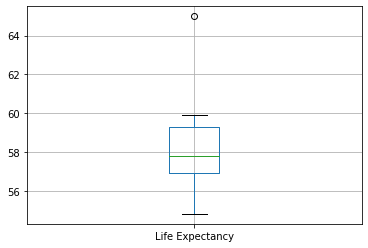

In [70]:
full_df.loc[full_df['Country']=='Afghanistan'].boxplot(column=['Life Expectancy'])

In [78]:
full_df.loc[full_df['Country']=='Afghanistan'].iloc[:,[4,5,6,7]]

,Life Expectancy,Adult Mortality,infant deaths,Alcohol
0,54.8,321.0,88,0.01
1,55.3,316.0,88,0.01
2,56.2,3.0,88,0.01
3,56.7,295.0,87,0.01
4,57.0,293.0,87,0.02
5,57.3,291.0,85,0.02
6,57.3,295.0,84,0.03
7,57.5,295.0,82,0.02
8,58.1,287.0,80,0.03
9,58.6,281.0,77,0.01
